이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [22]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs22/정규세션/3주차/KNN&KMeans/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 3. KNN 구현 & 파라미터 튜닝


In [11]:
# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할: 훈련 데이터 70%, 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN 모델 초기화 및 훈련 (k=5로 초기 설정)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = knn.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [12]:
print(accuracy)
print(conf_matrix)
print(report)

0.6926406926406926
[[119  32]
 [ 39  41]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



In [13]:
from sklearn.model_selection import GridSearchCV

# KNN 모델을 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': range(1, 31),  # k 값을 1부터 30까지 시험
    'weights': ['uniform', 'distance'],  # 균등 가중치, 거리 가중치
    'metric': ['euclidean', 'manhattan', 'minkowski']  # 사용할 거리 측정법
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 그 때의 성능
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'},
 0.7784181377639321)

## 4. 평가

In [16]:
# 최적의 하이퍼파라미터로 KNN 모델 초기화 및 훈련
best_knn = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='manhattan')
best_knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_best = best_knn.predict(X_test)

# 최종 성능 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

In [17]:
# 최종 성능 평가
print(accuracy_best)
print(conf_matrix_best)
print(report_best)

0.7012987012987013
[[125  26]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       151
           1       0.59      0.46      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



---
# 2. K-Means 과제

## 1. 데이터 로드

In [18]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs22/정규세션/3주차/KNN&KMeans/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [19]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

(                          status_id status_type status_published  \
 0  246675545449582_1649696485147474       video   4/22/2018 6:00   
 1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
 2  246675545449582_1648730588577397       video   4/21/2018 6:17   
 3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
 4  246675545449582_1645700502213739       photo   4/18/2018 3:22   
 
    num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
 0            529           512         262        432         92         3   
 1            150             0           0        150          0         0   
 2            227           236          57        204         21         1   
 3            111             0           0        111          0         0   
 4            213             0           0        204          9         0   
 
    num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
 0          1         1           

In [20]:
# 불필요한 열 삭제
df_clean = df.drop(['status_id', 'status_type', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

# 데이터 정규화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# 정규화된 데이터 확인
pd.DataFrame(df_scaled, columns=df_clean.columns).head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


## 3. K-Means 구현 & 파라미터 튜닝

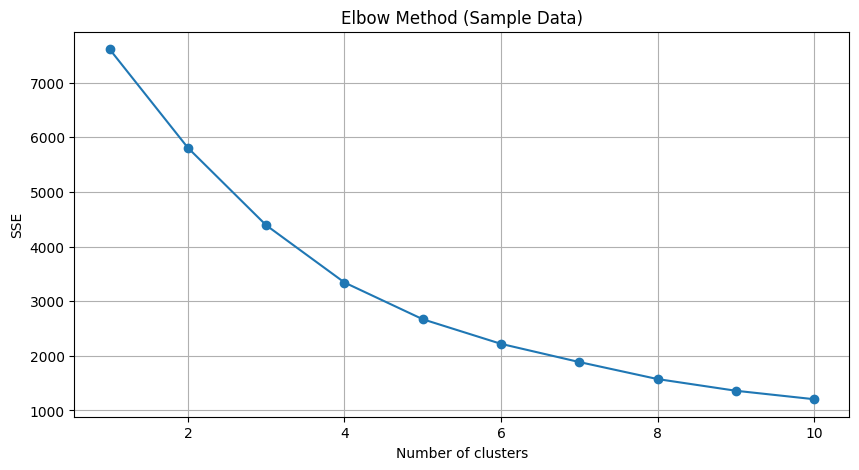

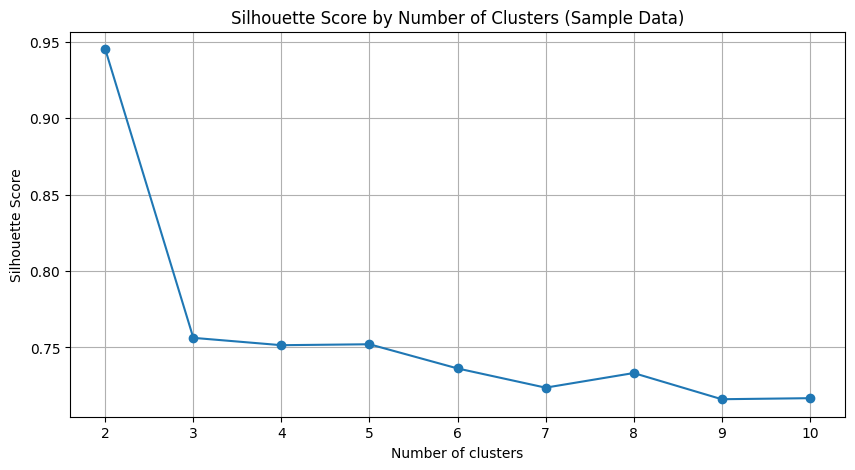

In [23]:
# 데이터 샘플링: 전체 데이터의 10%
sample_data = df_scaled[np.random.choice(df_scaled.shape[0], size=int(0.1 * df_scaled.shape[0]), replace=False)]

# 샘플 데이터에 대해 다시 K-Means 클러스터링 실행
sse_sample = []
silhouette_scores_sample = []

for k in range(1, 11):
    kmeans_sample = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_sample.fit(sample_data)
    sse_sample.append(kmeans_sample.inertia_)
    if k > 1:
        score_sample = silhouette_score(sample_data, kmeans_sample.labels_)
        silhouette_scores_sample.append(score_sample)

# Elbow Method 그래프 (샘플 데이터)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse_sample, marker='o')
plt.title('Elbow Method (Sample Data)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

# Silhouette Score 그래프 (샘플 데이터)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_sample, marker='o')
plt.title('Silhouette Score by Number of Clusters (Sample Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

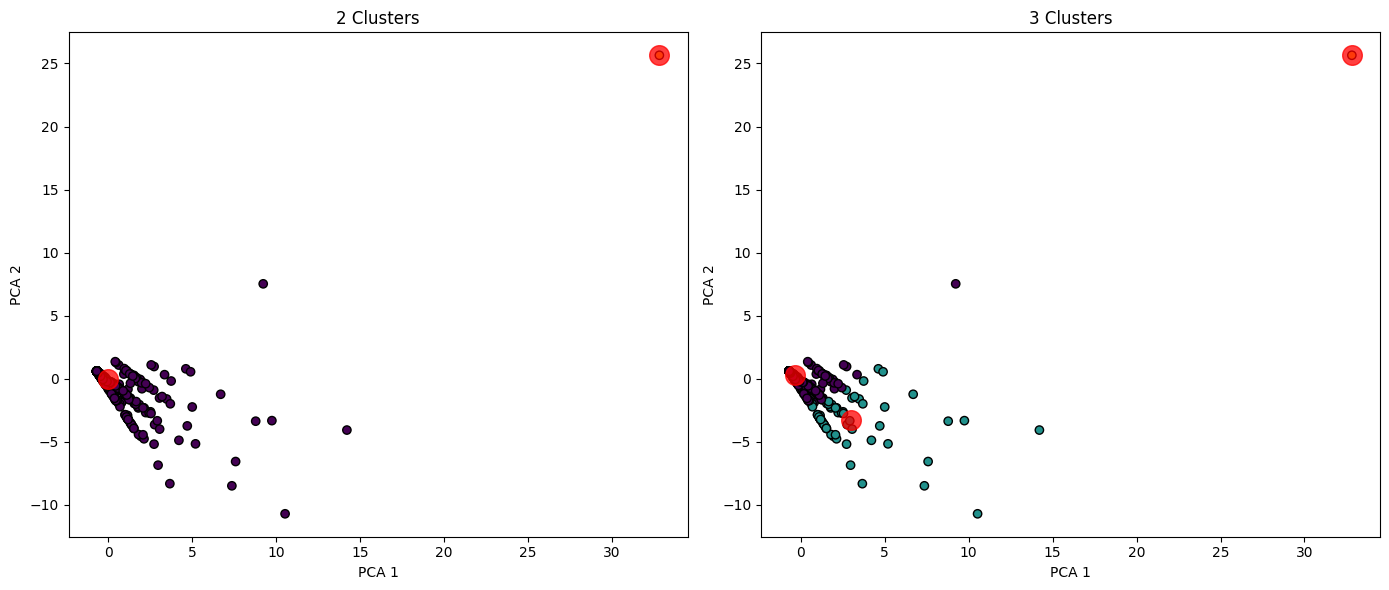

In [24]:
from sklearn.decomposition import PCA

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
sample_data_2d = pca.fit_transform(sample_data)

# k=2와 k=3에 대한 클러스터링 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# k=2
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters_2 = kmeans_2.fit_predict(sample_data)
axes[0].scatter(sample_data_2d[:, 0], sample_data_2d[:, 1], c=clusters_2, cmap='viridis', marker='o', edgecolor='k')
centers_2 = pca.transform(kmeans_2.cluster_centers_)
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, alpha=0.75)
axes[0].set_title('2 Clusters')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

# k=3
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters_3 = kmeans_3.fit_predict(sample_data)
axes[1].scatter(sample_data_2d[:, 0], sample_data_2d[:, 1], c=clusters_3, cmap='viridis', marker='o', edgecolor='k')
centers_3 = pca.transform(kmeans_3.cluster_centers_)
axes[1].scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, alpha=0.75)
axes[1].set_title('3 Clusters')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

## 4. 평가

Elbow Method:

SSE(클러스터 내 분산의 합) 그래프를 보면, 클러스터 수가 증가함에 따라 SSE 값이 감소함. 특히 k=3에서 큰 감소를 보이며, 그 이후로는 완만하게 감소함. 이는 k=3이 적절한 클러스터 num임<br>
Silhouette Score:

클러스터 개수에 따른 Silhouette Score를 보면, k=2에서 가장 높은 값을 보이며, 이는 클러스터가 잘 형성되었음을 보임. 그 이후로 점차 감소하는 경향을 보임.
이 결과들을 종합하면, 클러스터의 개수가 2에서 3 사이일 때 꽤 좋은 클러스터링 성능을 보이는 것으로 해석할 수 있음. 특히 k=2에서 Silhouette Score가 높게 나오므로, 클러스터 2개를 사용할 때 좋음